In [5]:
import numpy as np
labels = ['baseline', '0.1%', '1%', '2%', '5%']

# of the framework
accuracy = [0.8828, 0.8878, 0.8028, 0.8031, 0.8018]
nmi = [0.9081, 0.9131, 0.7855, 0.7850, 0.7839]
kappa = [0.8434, 0.8498, 0.7245, 0.7249, 0.7232]

trento = np.vstack((accuracy, nmi, kappa))

kmeans = [0.49]

# order is accuracy of is unlabeled, labeled and both together of ss-k-means
ss_new_acc_01 = [0.61, 0.73, 0.61][-1]
ss_new_acc_1 = [0.31, 0,28, 0.31][-1]
ss_new_acc_2 = [0.29, 0.29, 0.29][-1]
ss_new_acc_5 = [0.21, 0.21, 0.21][-1]

0.21

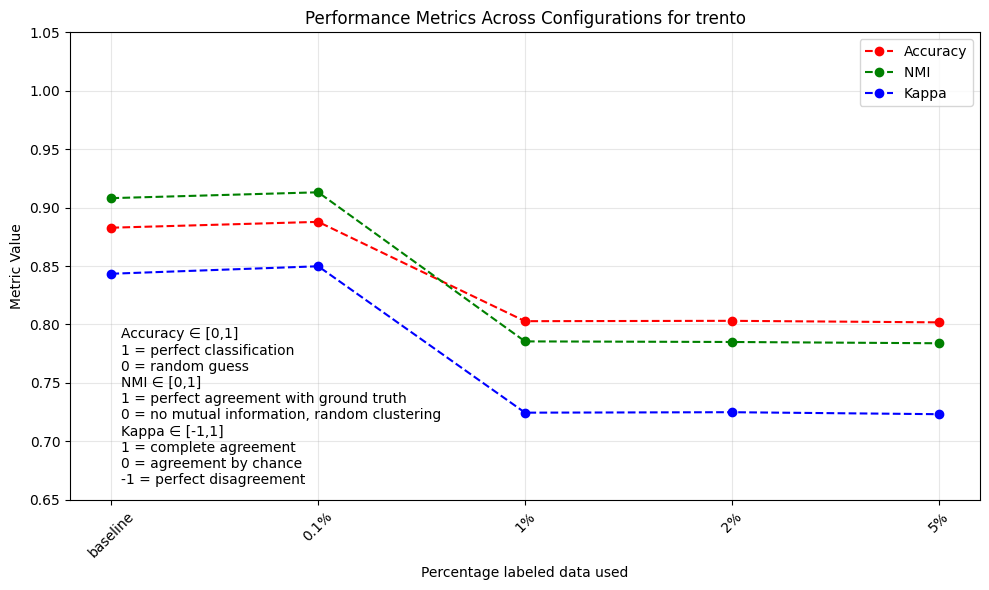

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# (6) Create the 2D Matplotlib figure
plt.figure(figsize=(10, 6))

# For scaling 0.2 (dashed lines)
plt.plot(labels, accuracy, marker='o', linestyle='--', color='red', label='Accuracy')
plt.plot(labels, nmi, marker='o', linestyle='--', color='green', label='NMI ')
plt.plot(labels, kappa, marker='o', linestyle='--', color='blue', label='Kappa')

# Customize plot
plt.title('Performance Metrics Across Configurations for trento')
plt.xlabel('Percentage labeled data (random) used')
plt.ylabel('Metric Value')
plt.ylim(0.65, 1.05)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
legend = plt.legend(loc='upper right')
plt.gca().add_artist(legend)

explanation = (
    "Accuracy ∈ [0,1]\n"
    "1 = perfect classification\n"
    "0 = random guess\n"
    "NMI ∈ [0,1]\n"
    "1 = perfect agreement with ground truth\n"
    "0 = no mutual information, random clustering\n"
    "Kappa ∈ [-1,1]\n"
    "1 = complete agreement\n"
    "0 = agreement by chance\n"
    "-1 = perfect disagreement"
)

# Create a dummy handle with an empty line (invisible) that only serves to hold the explanation text
dummy_handle = mlines.Line2D([], [], linestyle='', label=explanation)

# Create the second legend with the dummy handle, positioned to the right
legend2 = plt.legend(handles=[dummy_handle], loc='lower left', frameon=False)

plt.tight_layout()
plt.show()


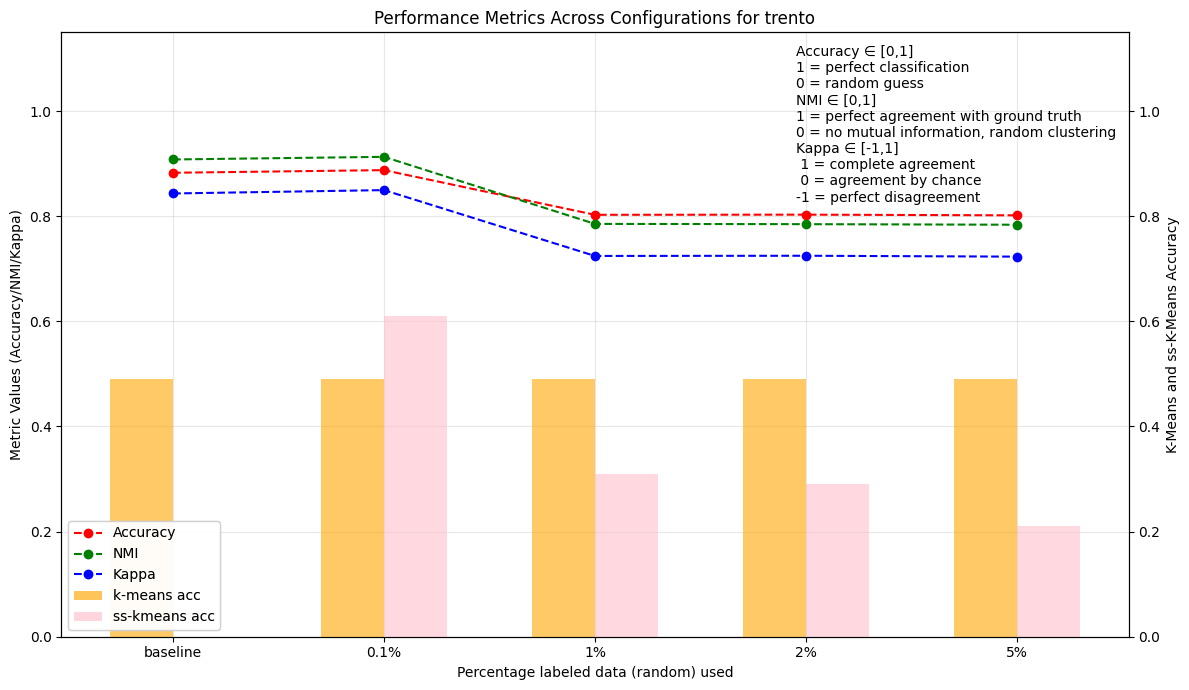

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Data definition
labels = ['baseline', '0.1%', '1%', '2%', '5%']
accuracy = [0.8828, 0.8878, 0.8028, 0.8031, 0.8018]
nmi = [0.9081, 0.9131, 0.7855, 0.7850, 0.7839]
kappa = [0.8434, 0.8498, 0.7245, 0.7249, 0.7232]
kmeans_value = 0.49
ss_new_acc_values = [0, 0.61, 0.31, 0.29, 0.21]

# Setup figure and axes
fig, ax1 = plt.subplots(figsize=(12, 7))
x = np.arange(len(labels))
width = 0.3

# Line plot (left y-axis)
ax1.plot(labels, accuracy, marker='o', linestyle='--', color='red', label='Accuracy')
ax1.plot(labels, nmi, marker='o', linestyle='--', color='green', label='NMI')
ax1.plot(labels, kappa, marker='o', linestyle='--', color='blue', label='Kappa')
ax1.set_ylabel('Metric Values (Accuracy/NMI/Kappa)', color='black')
ax1.set_ylim(0, 1.15)
ax1.grid(True, alpha=0.3)

# Create a second y-axis for histogram
ax2 = ax1.twinx()

# Histogram bars (right y-axis)
bars1 = ax2.bar(x - width/2, [kmeans_value]*len(labels), width, label='k-means acc', alpha=0.6, color='orange')
bars2 = ax2.bar(
    x + width/2,
    [val if val is not None else 0 for val in ss_new_acc_values],
    width,
    label='ss-kmeans acc',
    color='pink',
    alpha=0.6
)

# Hide irrelevant bar for baseline
for bar, val in zip(bars2, ss_new_acc_values):
    if val is None:
        bar.set_visible(False)

ax2.set_ylabel('K-Means and ss-K-Means Accuracy', color='black')
ax2.set_ylim(0, 1.15)
ax2.patch.set_alpha(0)

# Customizing plot
plt.title('Performance Metrics Across Configurations for trento')
ax1.set_xlabel('Percentage labeled data (random) used')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Legends
lines, labels_lines = ax1.get_legend_handles_labels()
bars, labels_bars = ax2.get_legend_handles_labels()
legend1 = ax2.legend(lines + bars, labels_lines + labels_bars, loc='lower left')
ax2.add_artist(legend1)

# Explanation legend (bottom left)
explanation = (
    "Accuracy ∈ [0,1]\n"
    "1 = perfect classification\n"
    "0 = random guess\n"
    "NMI ∈ [0,1]\n"
    "1 = perfect agreement with ground truth\n"
    "0 = no mutual information, random clustering\n"
    "Kappa ∈ [-1,1]\n"
    " 1 = complete agreement\n"
    " 0 = agreement by chance\n"
    "-1 = perfect disagreement"
)
dummy_handle = mlines.Line2D([], [], linestyle='', label=explanation)
ax1.legend(handles=[dummy_handle], loc='upper right', frameon=False)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.tight_layout()
plt.show()